In [1]:
import numpy as np
import pandas as pd
# Load Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("/home/theuri/Documents/ADS/Assignment 10/KAG_conversion_data.csv")

In [3]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [4]:
df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [5]:
df.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [6]:
df.rename(columns={'xyz_campaign_id':'xyzCampId', 'fb_campaign_id':'fbCampId','Total_Conversion':'conv','Approved_Conversion':'appConv'}, inplace=True)
df['xyzCampId'].unique()
df['xyzCampId'].replace({916:'campA', 936:'campB', 1178:'campC'}, inplace=True)

df.head()

,ad_id,xyzCampId,fbCampId,age,gender,interest,Impressions,Clicks,Spent,conv,appConv
0,708746,campA,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,campA,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,campA,103920,30-34,M,20,693,0,0.00,1,0
3,708815,campA,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,campA,103928,30-34,M,28,4133,1,1.29,1,1


In [7]:
df.describe()

,ad_id,fbCampId,interest,Impressions,Clicks,Spent,conv,appConv
count,1.143000e+03,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


We can see there is a large distribution in impressions with STD being 312762.2 indicating some ads recieve much more exposure than others

In [8]:
df1 = pd.get_dummies(df, columns = ['xyzCampId', 'age', 'gender'])

## Correlation Matrix

Have removed ad id, FB campaign id, and interests as the numbers are arbitary for correlation

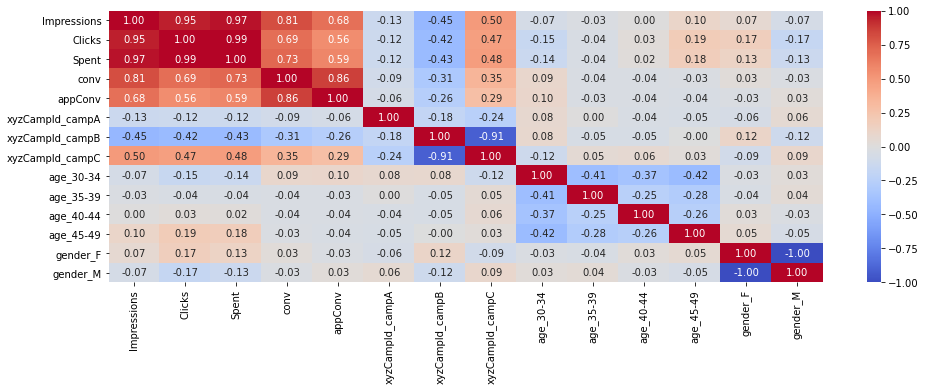

In [9]:
plt.figure(figsize=(16,5))
x=sns.heatmap(df1[df1.columns.difference(['ad_id','fbCampId','interest'], sort=False)].corr(),annot=True ,fmt=".2f", cmap="coolwarm")

Looking at the correlation matrix we can see both total and approved conversions are positively correlated with the 30-34 age group these customers are more likely to both inquire and buy the product that other age groups.

Meanwhile, Clicks are positively correlated with the age groups: 40-44 & 45-49. This indicates older customers are more likely to click on the ad however when we look at conversions for this age group it is negatively correlated suggesting they inquire about the product and complete pruchases at a lower rate than younger age groups.

Additionally, we see Females are much more likely to click on the advertisement and inquire about the product however after inquiry males seem to purchase the product more.

Finally, looking at the campaigns we see noth campaign A & B were targeted more towards younger customers as there is a positive correlation with ages 30-34 while campaign C was targeted at older customers as there is a negative correlation with ages 30-34.

On a side note the campaign correlations with non demographic variables are due to large difference in impressions of the campaigns compared to the actual number of individual ads as will be shown below.

## Campaign deep dive

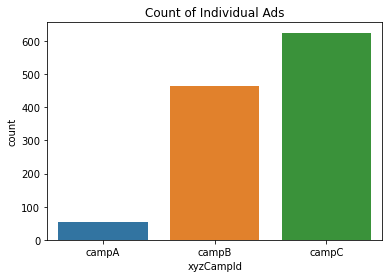

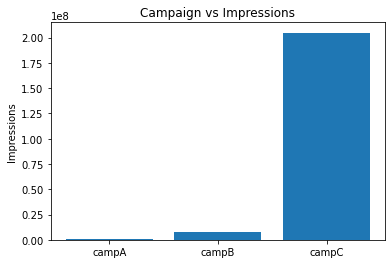

In [10]:
sns.countplot(x ='xyzCampId', data = df).set_title('Count of Individual Ads')
plt.show() 

campSum = df.groupby(by=['xyzCampId']).sum()
plt.bar(campSum.index, campSum["Impressions"])
plt.ylabel("Impressions")
plt.title("Campaign vs Impressions")
plt.show()

## Need for additional features to properly measure campaign efficacy

Due to the unequal distribution of both individual ads and the impressions of each campaign there is a need for additional KPI features such as click through rate (CTR), cost per click (CPC), conversion rate and customer aquisition cost (CAC).

An assumption being made for CAC is each ad link directs to the exact same landing page and as such customers have the same purchasing experience.

Additionally we could use return on ad spend to get a more hollistic analysis however due to having no information on the value of both the customers along with the cost of the product involved in the ad we will assume the company is advertsing widgets at the exact same price for each campaign along with the different demographic customer groups (female, age 30-34) all being worth the same lifetime value which although not ideal will allow for an easier analysis.

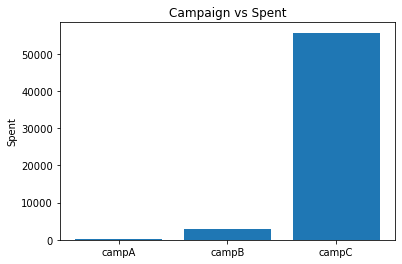

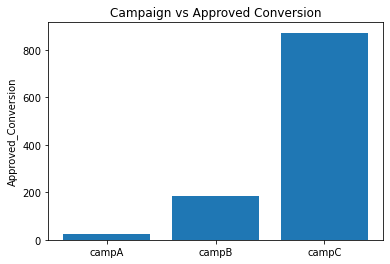

In [11]:
plt.bar(campSum.index, campSum["Spent"])
plt.ylabel("Spent")
plt.title("Campaign vs Spent")
plt.show()

campSum = df.groupby(by=['xyzCampId']).sum()
plt.bar(campSum.index, campSum["appConv"])
plt.ylabel("Approved_Conversion")
plt.title("Campaign vs Approved Conversion")
plt.show()

No surprises here, Campaign C has the highest ad spend and highest conversions which is consistent with its high impressions in the previous chart

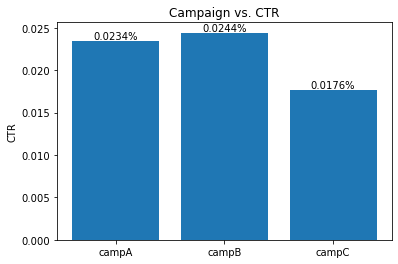

In [12]:
campCTR = campSum['Clicks']/campSum['Impressions']*100
# Creating our bar plot
plt.bar(campCTR.index, campCTR)
plt.ylabel("CTR")
plt.title("Campaign vs. CTR")
for x,y in zip(campCTR.index, campCTR):

    label = "{:.4f}%".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()

Here we see both Campaign A & B have higher CTR's indicating they either have a more effective message or better targeting than campaign C. We will investigate this further.

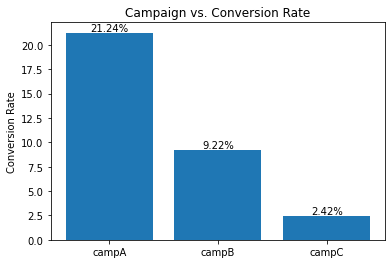

In [13]:
campConv = campSum['appConv']/campSum['Clicks']*100
# Creating our bar plot
plt.bar(campConv.index, campConv)
plt.ylabel("Conversion Rate")
plt.title("Campaign vs. Conversion Rate")
for x,y in zip(campConv.index, campConv):

    label = "{:.2f}%".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()

In [14]:
overallConvRate = round(df['appConv'].sum()/df['Clicks'].sum()*100, 2)
print(overallConvRate)

2.83


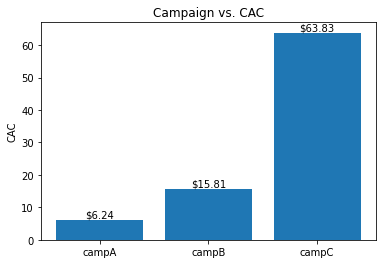

In [15]:
campCAC = campSum['Spent']/campSum['appConv']
# Creating our bar plot
plt.bar(campCAC.index, campCAC)
plt.ylabel("CAC")
plt.title("Campaign vs. CAC")
for x,y in zip(campCAC.index, campCAC):

    label = "${:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()

Here we see campaign C having a CAC of more than 4 times the next highest CAC of campaign B. This along with the CTR above helps build a story that Campaign C's messaging and targeting are off as they have both lower CTR meaning the message does not resonate as much with customers and they have a higher CAC likely meaning the targeted customers who do click the ad are not actually interested in purchasing the product. Another explanation could be the cost per click for Campaign C higher than the other 2 campaigns which we will now examine.

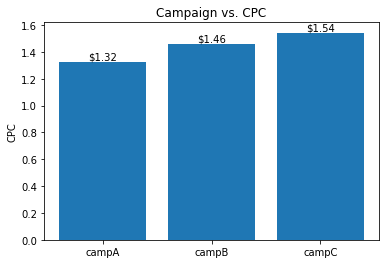

In [16]:
campCPC = campSum['Spent']/campSum['Clicks']
# Creating our bar plot
plt.bar(campCPC.index, campCPC)
plt.ylabel("CPC")
plt.title("Campaign vs. CPC")
for x,y in zip(campCPC.index, campCPC):

    label = "${:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()

CPC of Campaign C is the highest however this difference does not make up for the much larger CAC Campaign C has.

## Gender

In [17]:
genSum = df.groupby(by=['gender']).sum()
total_impressions = df['Impressions'].sum()
#dropping both ad_id, fbCampId as they are not relevant to this portion
genSum.drop(['ad_id', 'fbCampId'], axis=1, inplace=True)

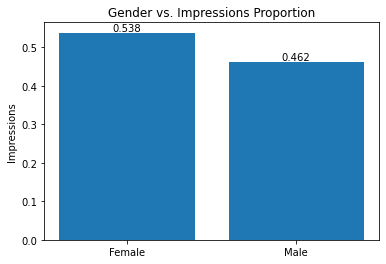

In [18]:
gen_impression_prop = {'Female': genSum['Impressions']['F']/total_impressions, 'Male': genSum['Impressions']['M']/total_impressions} 
plt.bar(gen_impression_prop.keys(), gen_impression_prop.values())
plt.ylabel("Impressions")
plt.title("Gender vs. Impressions Proportion")
for x,y in zip(gen_impression_prop.keys(), gen_impression_prop.values()):

    label = "{:.3f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()

Here we see that of the people who viewed the ad across campaigns, 54% were women and 46% were men

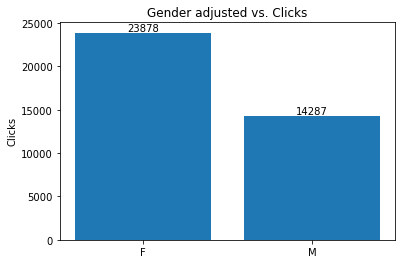

In [19]:
plt.bar(genSum.index, genSum['Clicks'])
plt.ylabel("Clicks")
plt.title("Gender adjusted vs. Clicks")
for x,y in zip(genSum.index, genSum['Clicks']):

    label = "{:.0f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()

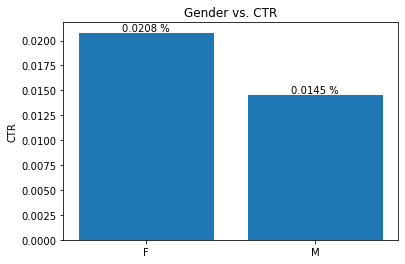

In [20]:
genCTR = genSum['Clicks']/genSum['Impressions']*100
plt.bar(genCTR.index, genCTR)
plt.ylabel("CTR")
plt.title("Gender vs. CTR")
for x,y in zip(genCTR.index, genCTR):

    label = "{:.4f} %".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()

Females have a higher CTR than Males

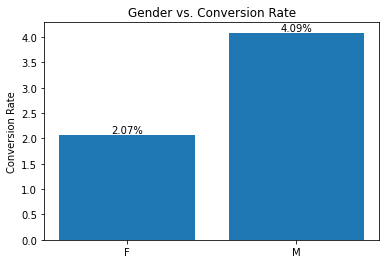

In [21]:
genConvRate = genSum['appConv']/genSum['Clicks']*100
plt.bar(genConvRate.index, genConvRate)
plt.ylabel("Conversion Rate")
plt.title("Gender vs. Conversion Rate")
for x,y in zip(genConvRate.index, genConvRate):

    label = "{:.2f}%".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()

Although females have a higher CTR Males are almost twice as likely to actually complete a purchase once on the site

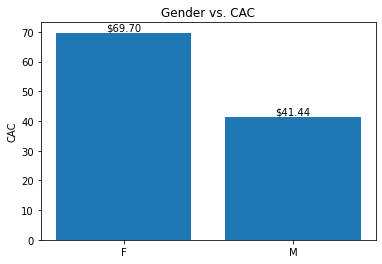

In [22]:
genCAC = genSum['Spent']/genSum['appConv']
plt.bar(genCAC.index, genCAC)
plt.ylabel("CAC")
plt.title("Gender vs. CAC")
for x,y in zip(genCAC.index, genCAC):

    label = "${:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()

As such, due to both the CTR and conversion rate males CAC is only 2/3 that of Females

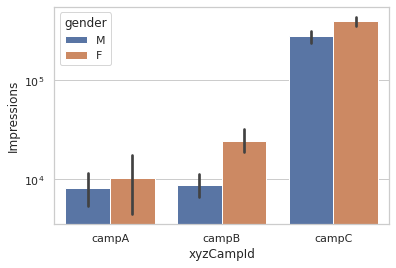

In [23]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
g = sns.barplot(x=df["xyzCampId"], y=df["Impressions"], hue=df["gender"], data=tips)
g.set_yscale('log')

Across all campaigns females are more exposed to the advertisements

<AxesSubplot:xlabel='xyzCampId'>

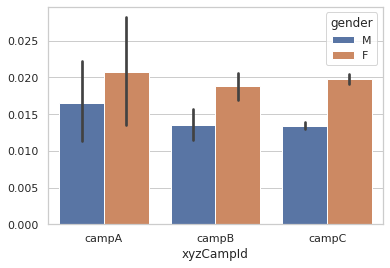

In [24]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
sns.barplot(x=df["xyzCampId"], y=df["Clicks"]/df['Impressions']*100, hue=df["gender"], data=tips)

Additionally they have a higher CTR & CAC on all campaigns and with a lower conversion as shown below

Text(0.5, 1.0, 'Conversion rate by Gender')

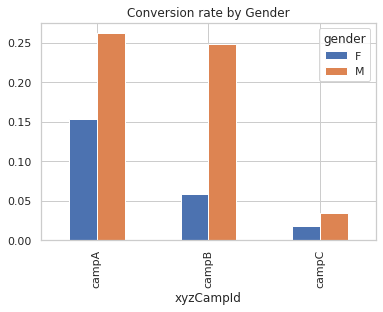

In [25]:
genCampSum = df.groupby(by = ['xyzCampId', 'gender']).sum()
genCampConv = genCampSum['appConv']/genCampSum['Clicks']
genCampSumCov = genCampSum.merge(genCampConv.rename('Conversion Rate'), left_index=True, right_index=True)

genCampSumCov['Conversion Rate'].unstack().plot(kind='bar').set_title('Conversion rate by Gender')

Text(0.5, 1.0, 'CAC by Gender')

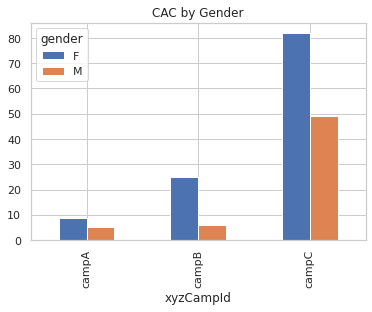

In [26]:
genCampSum = df.groupby(by = ['xyzCampId', 'gender']).sum()
genCampCAC = genCampSum['Spent']/genCampSum['appConv']
genCampSumCAC = genCampSum.merge(genCampCAC.rename('CAC'), left_index=True, right_index=True)

genCampSumCAC['CAC'].unstack().plot(kind='bar').set_title('CAC by Gender')

## Age

In [27]:
ageSum = df.groupby(by=['age']).sum()
#dropping both ad_id, fbCampId as they are not relevant to this portion
ageSum.drop(['ad_id', 'fbCampId'], axis=1, inplace=True)

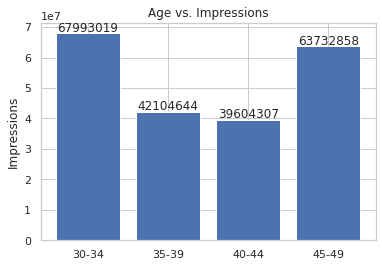

In [28]:
plt.bar(ageSum.index, ageSum['Impressions'])
plt.ylabel("Impressions")
plt.title("Age vs. Impressions")
for x,y in zip(ageSum.index, ageSum['Impressions']):

    label = "{:.0f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()

Age 30-34 has the highest impressions with 45-49 close behind

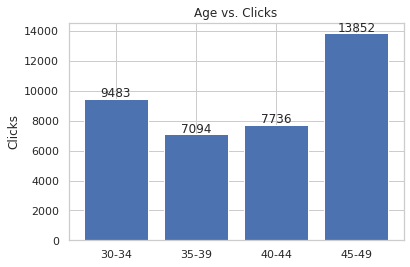

In [29]:
plt.bar(ageSum.index, ageSum['Clicks'])
plt.ylabel("Clicks")
plt.title("Age vs. Clicks")
for x,y in zip(ageSum.index, ageSum['Clicks']):

    label = "{:.0f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()

The clicks however show a different story with age 45-49 having by far the most clicks

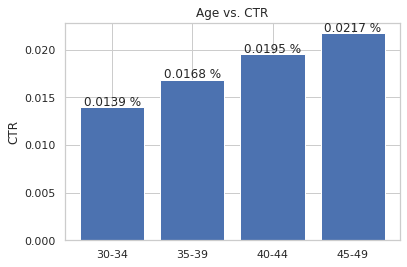

In [30]:
ageCTR = ageSum['Clicks']/ageSum['Impressions']*100
plt.bar(ageCTR.index, ageCTR)
plt.ylabel("CTR")
plt.title("Age vs. CTR")
for x,y in zip(ageCTR.index, ageCTR):

    label = "{:.4f} %".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()



As such age 45-49 has the highest CTR with age 30-34 being the lowest

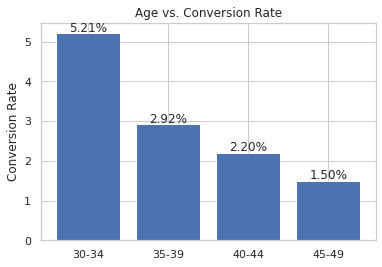

In [31]:
ageConvRate = ageSum['appConv']/ageSum['Clicks']*100
plt.bar(ageConvRate.index, ageConvRate)
plt.ylabel("Conversion Rate")
plt.title("Age vs. Conversion Rate")
for x,y in zip(ageConvRate.index, ageConvRate):

    label = "{:.2f}%".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()

However looking at conversion rate ages 30-34 are almost double the conversion rate of any other group

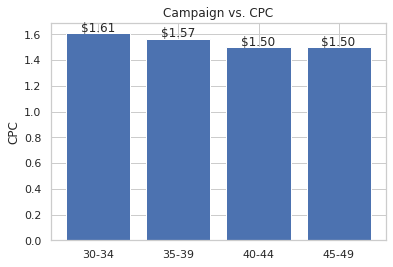

In [32]:
ageCPC = ageSum['Spent']/ageSum['Clicks']
# Creating our bar plot
plt.bar(ageCPC.index, ageCPC)
plt.ylabel("CPC")
plt.title("Campaign vs. CPC")
for x,y in zip(ageCPC.index, ageCPC):

    label = "${:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()

CPC decreases as age increases

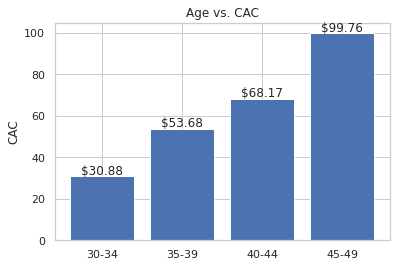

In [33]:
ageCAC = ageSum['Spent']/ageSum['appConv']
plt.bar(ageCAC.index, ageCAC)
plt.ylabel("CAC")
plt.title("Age vs. CAC")
for x,y in zip(ageCAC.index, ageCAC):

    label = "${:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()

As we see CTR increase with age and conversion rate decrease with age it makes sense 45-49 have the highest customer aquisition cost while 30-34 are the lowest

## Campaign by Age

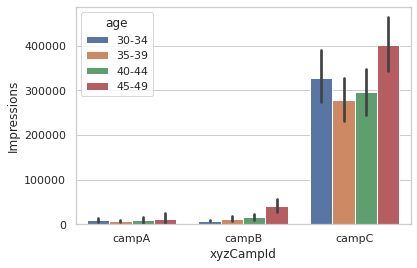

In [34]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
g = sns.barplot(x=df["xyzCampId"], y=df["Impressions"], hue=df["age"], data=tips)

Camp A is the most evenly distributed across age groups while Camp B and C are more targeted towards 45-49

<AxesSubplot:xlabel='xyzCampId'>

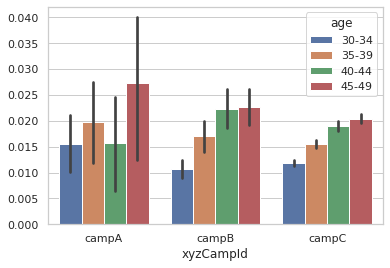

In [35]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
sns.barplot(x=df["xyzCampId"], y=df["Clicks"]/df['Impressions']*100, hue=df["age"], data=tips)

Looking at the CTR we see camp A has the highest in 3 of the four age group less 40-44

Text(0.5, 1.0, 'Conversion rate by Age')

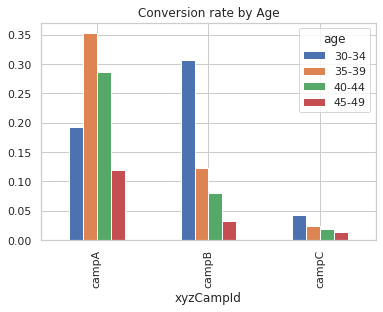

In [36]:
ageCampSum = df.groupby(by = ['xyzCampId', 'age']).sum()
ageCampConv = ageCampSum['appConv']/ageCampSum['Clicks']
ageCampSumCov = ageCampSum.merge(ageCampConv.rename('Conversion Rate'), left_index=True, right_index=True)

ageCampSumCov['Conversion Rate'].unstack().plot(kind='bar').set_title('Conversion rate by Age')

Campaign A has the highest conversion rate for all age groups execpt 30-34 while campaign C is the lowest

Text(0.5, 1.0, 'CAC by Age')

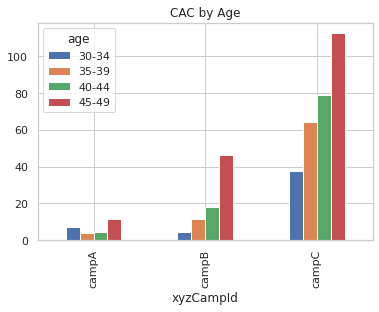

In [37]:
ageCampSum = df.groupby(by = ['xyzCampId', 'age']).sum()
ageCampCAC = ageCampSum['Spent']/ageCampSum['appConv']
ageCampSumCAC = ageCampSum.merge(ageCampCAC.rename('CAC'), left_index=True, right_index=True)

ageCampSumCAC['CAC'].unstack().plot(kind='bar').set_title('CAC by Age')

We see a steady trend of CAC increasing with age in all but Campaign A where 35-44 are lower than the 30-34 age group, this could be due to a low sample size which we will look at now

In [38]:
ageCampSum = df.groupby(by = ['xyzCampId', 'age']).sum()
print(ageCampSum['Impressions'])
print(ageCampSum['Clicks'])

xyzCampId  age  
campA      30-34      257672
           35-39       81076
           40-44       61977
           45-49       82200
campB      30-34     1655949
           35-39     1111675
           40-44     1203597
           45-49     4156966
campC      30-34    66079398
           35-39    40911893
           40-44    38338733
           45-49    59493692
Name: Impressions, dtype: int64
xyzCampId  age  
campA      30-34       57
           35-39       17
           40-44       14
           45-49       25
campB      30-34      286
           35-39      275
           40-44      311
           45-49     1112
campC      30-34     9140
           35-39     6802
           40-44     7411
           45-49    12715
Name: Clicks, dtype: int64


Sample size for this particular analysis of Campaign A may have to few clicks to give an accurate picture

## Interest

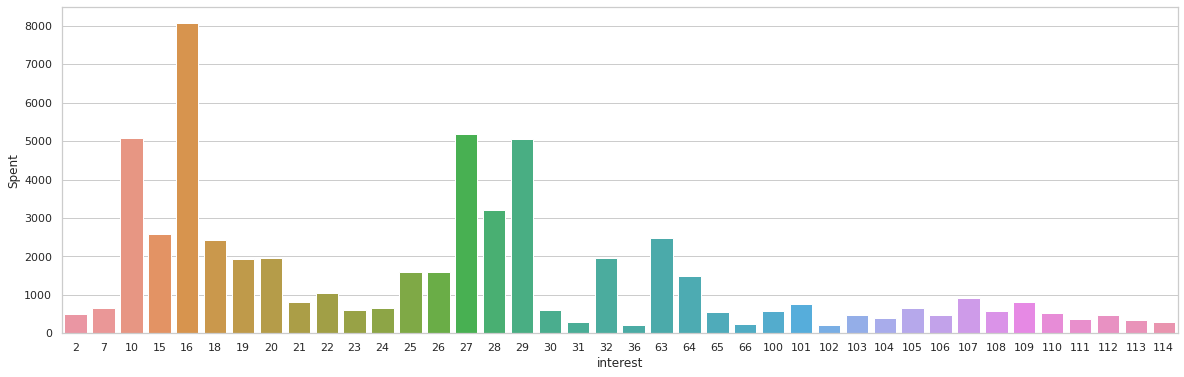

In [39]:
interestSum = df.groupby('interest').sum()
interestSum.reset_index(inplace=True)
# count plot on single categorical variable 
fig_dims = (20,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = 'interest', y ='Spent', data = interestSum)
# Show the plot 
plt.show() 

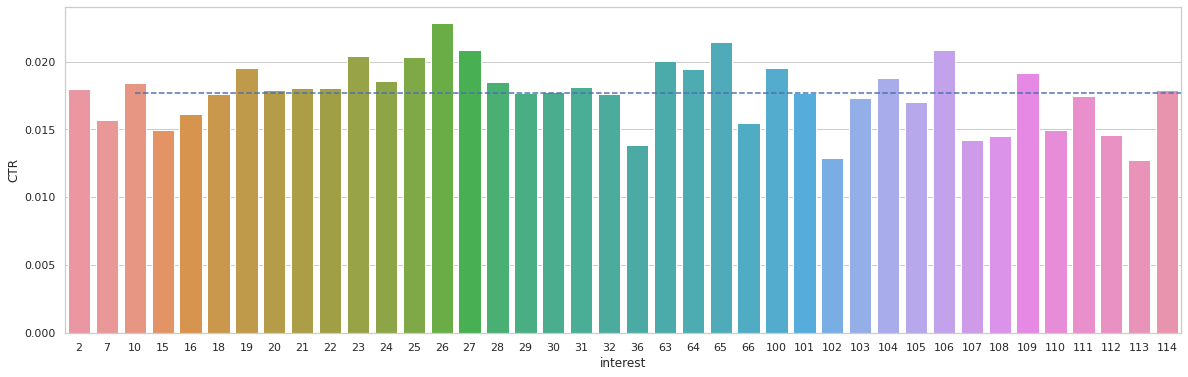

In [40]:
interestSum = df.groupby('interest').sum()
interestCTR = interestSum['Clicks']/interestSum['Impressions']*100
interestSumCTR = interestSum.merge(interestCTR.rename('CTR'), left_index=True, right_index=True)
CTRmean = [np.mean(interestSumCTR['CTR'])]*len(interestSumCTR.index)

# count plot on single categorical variable 
fig_dims = (20,6)
fig, ax = plt.subplots(figsize=fig_dims)
mean_line = ax.plot(interestSumCTR.index,CTRmean, label='Mean', linestyle='--')
sns.barplot(x =interestSumCTR.index, y ='CTR', data = interestSumCTR) 
# Show the plot 
plt.show() 

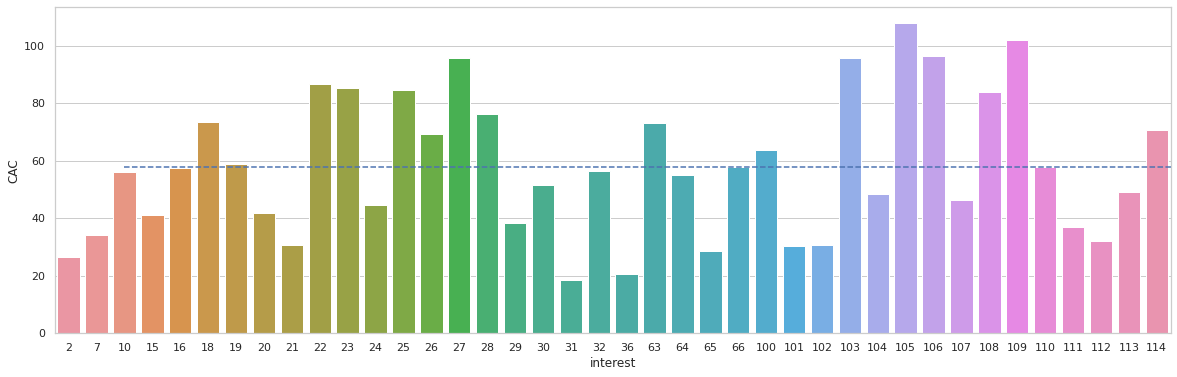

In [41]:
interestSum = df.groupby('interest').sum()
interestCAC = interestSum['Spent']/interestSum['appConv']
interestSumCAC = interestSum.merge(interestCAC.rename('CAC'), left_index=True, right_index=True)
CACmean = [np.mean(interestSumCAC['CAC'])]*len(interestSumCAC.index)

# count plot on single categorical variable 
fig_dims = (20,6)
fig, ax = plt.subplots(figsize=fig_dims)
mean_line = ax.plot(interestSumCAC.index,CACmean, label='Mean', linestyle='--')
sns.barplot(x =interestSumCAC.index, y ='CAC', data = interestSumCAC) 
# Show the plot 
plt.show() 

Looking at the charts we can see there are some individual interests which perform better than average. Let's examine further by pulling the best 10 performing interests based on CAC

In [42]:
interestKeyValues = interestSumCAC.sort_values(by = 'CAC', ascending=True).drop(columns=['ad_id', 'fbCampId']).head(n = 10)
interestKeyValues.reset_index(inplace=True)
print(interestKeyValues)

   interest  Impressions  Clicks       Spent  conv  appConv        CAC
0        31      1075312     195  299.099999    33       16  18.693750
1        36       922928     128  205.740000    28       10  20.574000
2         2      1727646     311  503.450005    40       19  26.497369
3        65      1737547     372  542.010001    33       19  28.526842
4       101      2960453     524  757.689998    71       25  30.307600
5        21      2833321     512  824.209999    70       27  30.526296
6       102      1160953     150  215.069999    14        7  30.724286
7       112      2324572     339  483.799999    53       15  32.253333
8         7      2612839     410  648.929999    59       19  34.154210
9       111      1490896     260  370.649998    30       10  37.065000


Lets investigate these top interest catagories more closely through segmenting by gender

In [43]:
interestGenSum = df.groupby(by = ['interest', 'gender']).sum()
interestGenCAC = interestGenSum['Spent']/interestGenSum['appConv']
interestGenSumCAC = interestGenSum.merge(interestGenCAC.rename('CAC'), left_index=True, right_index=True)
interestGenSumCAC.reset_index(inplace=True)

interestGenKeyValues = interestGenSumCAC.sort_values(by = 'CAC', ascending=True).head(n = 10)
interestGenKeyValues = interestGenKeyValues.drop(columns=['ad_id', 'fbCampId', 'conv'])
print(interestGenKeyValues)

    interest gender  Impressions  Clicks       Spent  appConv        CAC
53       101      M       174381      17   25.450000        5   5.090000
57       103      M       281841      30   44.270000        3  14.756667
36        31      F       457546     113  162.110000       10  16.211000
41        36      M       810196     105  175.479999       10  17.548000
77       113      M       599120      45   66.520000        3  22.173333
37        31      M       617766      82  136.989999        6  22.831666
47        65      M      1016769     197  297.440001       13  22.880000
73       111      M       170763      18   25.610000        1  25.610000
55       102      M       312803      36   52.140000        2  26.070000
71       110      M       920827     113  158.870000        6  26.478333


Looking at the data above we can see Males with interest 101 have a drastically lower CAC than any other interest. This could be by chance however due to the small click sample size. Another interesting insight is interest 31 is effective for both males and females. lets examine interest CAC for females further

In [44]:
interestGenSum = df.groupby(by = ['interest', 'gender']).sum()
interestGenCAC = interestGenSum['Spent']/interestGenSum['appConv']
interestGenSumCAC = interestGenSum.merge(interestGenCAC.rename('CAC'), left_index=True, right_index=True)
interestGenSumCAC.reset_index(inplace=True)


interestFSumCAC = interestGenSumCAC[interestGenSumCAC.gender != 'M']

interestFKeyValues = interestFSumCAC.drop(columns=['ad_id', 'fbCampId', 'conv'], inplace=True)
interestFKeyValues = interestFSumCAC.sort_values(by = 'CAC', ascending=True).head(n = 10)
print(interestFKeyValues)

    interest gender  Impressions  Clicks       Spent  appConv        CAC
36        31      F       457546     113  162.110000       10  16.211000
0          2      F       348242      72  106.230000        4  26.557500
74       112      F      1918436     297  422.449999       14  30.175000
16        21      F      1472470     310  474.969999       15  31.664667
54       102      F       848150     114  162.929999        5  32.586000
48        66      F       107689      23   34.770000        1  34.770000
38        32      F      1941111     347  538.840002       15  35.922667
52       101      F      2786072     507  732.239998       20  36.612000
72       111      F      1320133     242  345.039998        9  38.337778
46        65      F       720778     175  244.570000        6  40.761667


/home/theuri/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


We find interest 31 is a bit of an outlier as it is $10 less than any other CAC.

## Age and interest

In [45]:
interestAgeSum = df.groupby(by = ['interest', 'age']).sum()
interestAgeCAC = interestAgeSum['Spent']/interestAgeSum['appConv']
interestAgeSumCAC = interestAgeSum.merge(interestAgeCAC.rename('CAC'), left_index=True, right_index=True)

interestAgeKeyValues = interestAgeSumCAC.sort_values(by = 'CAC', ascending=True)
interestAgeKeyValues = interestAgeKeyValues[~(interestAgeKeyValues['Clicks'] <= 10)]  
interestAgeKeyValues = interestAgeKeyValues.drop(columns=['ad_id', 'fbCampId', 'conv'])
interestAgeKeyValues.reset_index(inplace=True)
print(interestAgeKeyValues.head(n =20))

    interest    age  Impressions  Clicks        Spent  appConv        CAC
0        102  30-34       154195      11    14.120000        3   4.706667
1         31  30-34       259505      24    38.250000        8   4.781250
2        103  35-39        92080      12    16.940000        2   8.470000
3         36  35-39        92470      12    20.020000        2  10.010000
4         18  40-44        72875      16    23.880000        2  11.940000
5         65  35-39       306311      67   100.370001        7  14.338572
6         36  30-34       474378      53    86.549999        6  14.425000
7         21  30-34      1207627     164   281.960000       19  14.840000
8        101  30-34       596534      86   121.210003        8  15.151250
9        110  30-34       410008      44    61.150000        4  15.287500
10         2  30-34       687634     105   171.730001       11  15.611818
11        16  30-34      6199021     684  1098.269995       60  18.304500
12        10  30-34      3738627     4

Utilized 20 rows compared to 10 in gender due to the larger amount of rows involved in a age-interest group. Removing all rows with Clicks < 10 due to the higher likelyhood of being affected by chance. Both interest 102 & 31 have much lower CAC and would be worth investing in to determine if the CAC is sustainable with higher exposure.

## Random Forest Regression Analysis to determine factors influencing approved conversions

In [47]:
df = pd.read_csv('/home/theuri/Documents/ADS/Assignment 10/KAG_conversion_data.csv')
df.rename(columns={'xyz_campaign_id':'xyzCampId', 'fb_campaign_id':'fbCampId','Total_Conversion':'conv','Approved_Conversion':'appConv'}, inplace=True)
df['xyzCampId'].unique()
df['xyzCampId'].replace({916:'campA', 936:'campB', 1178:'campC'}, inplace=True)
df2 = df
df2.drop(columns=['ad_id'], inplace=True)
len(df2)

1143

Drop Ad Id as it is irrelevant

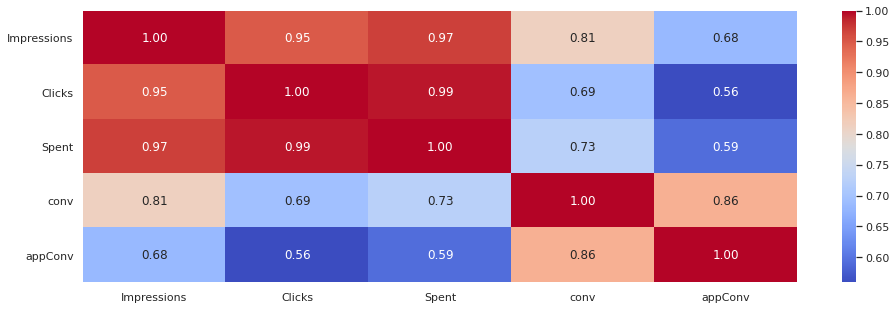

In [48]:
plt.figure(figsize=(16,5))
x=sns.heatmap(df[df.columns.difference(['ad_id','fbCampId','interest'], sort=False)].corr(),annot=True ,fmt=".2f", cmap="coolwarm")

Impressions, Clicks and Spend are all extermely correlated must pic one out of the three for analysis

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

df2 = pd.get_dummies(df2, columns=['age', 'gender', 'interest'])
df2.drop(columns=['gender_M','age_45-49', 'xyzCampId','Spent', 'Clicks','conv','fbCampId','appConv', 'interest_107'], inplace=True)

# the independent variables set 
X = df2

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 

# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
						for i in range(len(X.columns))] 

print(vif_data)

         feature       VIF
0    Impressions  1.442004
1      age_30-34  2.691357
2      age_35-39  1.994252
3      age_40-44  1.829172
4       gender_F  2.009334
5     interest_2  1.130865
6     interest_7  1.123589
7    interest_10  1.373934
8    interest_15  1.240468
9    interest_16  1.610996
10   interest_18  1.173625
11   interest_19  1.103733
12   interest_20  1.174798
13   interest_21  1.127023
14   interest_22  1.178294
15   interest_23  1.086738
16   interest_24  1.097200
17   interest_25  1.130182
18   interest_26  1.170884
19   interest_27  1.324431
20   interest_28  1.225318
21   interest_29  1.335528
22   interest_30  1.133818
23   interest_31  1.088232
24   interest_32  1.172722
25   interest_36  1.081382
26   interest_63  1.219901
27   interest_64  1.231676
28   interest_65  1.072747
29   interest_66  1.049319
30  interest_100  1.027394
31  interest_101  1.048676
32  interest_102  1.029667
33  interest_103  1.030961
34  interest_104  1.021834
35  interest_105  1.034150
3

All VIF are good after dropping various features

In [50]:
y = df['conv']

In [51]:
from sklearn.feature_selection import SelectKBest, f_regression
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_regression, k=40)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(33,'Score')) 

Xselect = featureScores.nlargest(5,'Score')['Specs'].to_list()
X = X[Xselect]

           Specs        Score
0    Impressions  2221.855026
31  interest_101    18.896867
1      age_30-34     8.621692
34  interest_104     8.296027
41  interest_112     7.838164
21   interest_29     5.155679
19   interest_27     4.136478
38  interest_109     3.637208
30  interest_100     3.637208
27   interest_64     3.052323
14   interest_22     3.042910
23   interest_31     3.003543
15   interest_23     2.974760
8    interest_15     2.490902
25   interest_36     2.469362
18   interest_26     2.230878
5     interest_2     2.006351
2      age_35-39     1.731950
16   interest_24     1.725031
10   interest_18     1.717989
3      age_40-44     1.707588
22   interest_30     1.640662
37  interest_108     1.611908
13   interest_21     1.535955
29   interest_66     1.384848
40  interest_111     1.380140
28   interest_65     1.203273
39  interest_110     1.083707
26   interest_63     1.038569
35  interest_105     1.031458
4       gender_F     0.867260
24   interest_32     0.515991
42  intere

In [55]:
import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     519.5
Date:                Wed, 03 Mar 2021   Prob (F-statistic):          1.42e-290
Time:                        12:23:15   Log-Likelihood:                -2656.7
No. Observations:                1143   AIC:                             5325.
Df Residuals:                    1137   BIC:                             5356.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1063      0.104      1.017      0.3

The factors which are both statistically significant and have the highest feature scores

In [58]:
y = np.array(y)
y.reshape(len(y), 1)
# Saving feature names for later use
feature_list = list(X)
# Convert to numpy array
X = np.array(X)


In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (857, 5)
Training Labels Shape: (857,)
Testing Features Shape: (286, 5)
Testing Labels Shape: (286,)


In [60]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
X = sc_x.fit_transform(X)

In [61]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000)

In [62]:
y_pred=rf.predict(X_test)
y_pred=np.round(y_pred)

In [63]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2_score=r2_score(y_test, y_pred)

## Mean Absolute Error

In [64]:
mae

1.2412587412587412

In [65]:
r2_score

0.6159084928290199

r-score indicating 61.59% of the data fits the model

In [69]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print(map('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances)];

<generator object <genexpr> at 0x7f2259bc8cf0>



## Conclusion

## 1. Campaigns

1. Campaign C had the highest number of individual ads, impressions, ad spend and total approved conversions
2. Campaign be had the highest CTR slight beating Campaign A while being over 25% larger than Campaign C
3. Campaign A had by far the highest conversion rate beating Campaign B by 2X and Campaign C by 10X
4. Campaign A had the lowest CAC at almost 10X lower than Campaign C and 3X lower than campaign B
5. Campaign A had the lowest CPC

## 2. Gender

1. Females had 54% of all impressions while males had 46%
2. Females had a higher CTR than males by ~ 20% while males almost doubled the Conversion rate of females
3. Female aquisiton cost was ~$30 higher that males
4. Both impressions and CTR across campaigns look similiar to the non campaign segmented equivalants
5. Conversion rates and CAC are similiar for both Campaign A and C however for Campaign B Male conversion rates are 5X females compared to non campaign segmented equivalants

## 3. Age

1. Ages 30-34 and 45-49 have the highest impressions
2. The CTR increases relatively steadily as we move up age groups with age 45-49 having a 56 % higher CTR than age 30-34
3. The Conversion rate on the other hand decreases steadily as we move up age groups with ages 30-34 having a 247 % higher Conversion rate than ages 45-49
4. Overall as age increases CAC from $30 at ages 30-34 to 100 at ages 45-49, what is interesting about this is CPC is lower as age increasing indicating the higher CAC is simply due to poor conversion rates for higher age groups
5. CTR and CAC are similiar across campaigns to non segmented equivalants however Conversion rates are much higher across all age groups for campaigns A and across the 3 youngest age groups for campaign B
6. Looking at importance of the age 30-34 range it is 2.5X as important as the next single factor feature

## 4. Interests

1. interests 31 & 36 have extremely low CAC compared to others
2. interests 101, 104 & 112 have the largest impact on total conversions while spend on these interest catagories is much lower than others
3. interests 31 & 102 combined with age group of 30-34 have a CAC of ~4.75 almost half of the next low interest-age segment
4. interest 101 has the lowest CAC when targeting males at ~5.10 almost 1/3 the next highest CAC for interest-gender segment


## Business insights and Next Steps

Business Insights

1.Optimizing target demographic

* should target the age group of 30 - 34 as they had a higher conversion rate than any other segment along with a lower CAC
* Males should be the main gender target as they had a higher conversion rate than any other segment along with a lower CAC
* Out of the four largest interest spends two are inefficient due to being higher than average CAC (interest 10 & 27)
* (this is dependant on LFV across customer segments being similiar)

2. Optimize campaigns
* currently largest spend is going to worst performing campaign
* Best campaign by CAC across age groups and gender is Campaign A

Next Steps

1. Gradually increase spend in Campaign A
* Due to the low sample size compared to other campaigns the findings could be a result of chance by increasing spend we can determine if that is the case
2. Increase ad spend on high performing interest catagories/decrease ad spend on low performing interest catagories
3. shift marketing spend to target a younger audiance
* (dependant on LFV across customer segments being similiar)

